# Project One

Team Members:





Project Description 

# Initial Code

## Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import requests

## Get data 

In [2]:
climate_df = pd.read_csv("climate_data.csv")
energy_df = pd.read_csv("energy_data.csv")
energy_cost_df = pd.read_csv("Tariffs_n_dates.csv")
production_df = pd.read_csv("production_data.csv")

# Unpivot raw energy data.
energy_df = energy_df.melt(id_vars=['Time stamp'],
                     var_name='device',
                     value_name='energy')
energy_df = energy_df.sort_values("Time stamp")

## Merge hourly data 

In [3]:
# Energy and Cost data
hourly_data = pd.merge(energy_df, energy_cost_df, how='left',
                      on="Time stamp")
hourly_data = hourly_data[["Time stamp",  "Date", "device", "energy","Price"]]
hourly_data["Total Cost"] = (hourly_data["energy"] 
                             * hourly_data["Price"])
hourly_data = hourly_data.drop("Price", axis=1)
hourly_data = hourly_data.sort_values("Date")
hourly_data.head()

,Time stamp,Date,device,energy,Total Cost
0,01/01/2020 00:00,01/01/2020,COMP_REF1,0.0000,0.000000
195,01/01/2020 16:00,01/01/2020,COMP_REF9,1.4900,2.474294
194,01/01/2020 16:00,01/01/2020,TUNEL1,0.1372,0.227834
193,01/01/2020 16:00,01/01/2020,TUNEL3,0.2318,0.384927
192,01/01/2020 16:00,01/01/2020,COMP_REF4,0.2772,0.460318


## Daily data 

In [4]:
# Energy, Production, Climate and Cost data
daily_data = hourly_data.groupby(by=["Date","device"], as_index=False).sum()
daily_data = pd.merge(daily_data, production_df, 
                      how='left', on='Date')
daily_data = pd.merge(daily_data, climate_df, 
                      how='left', on='Date')
daily_data["Date"] = pd.to_datetime(daily_data["Date"], dayfirst=True,  format="%d/%m/%Y")
daily_data.sort_values(by="Date", inplace=True)
daily_data.reset_index(drop=True, inplace=True)
daily_data.head()

,Date,device,energy,Total Cost,Product_A,Product_B,Temp,UV,PrecMM,Hum,Heat,DP,WChill,FLike
0,2019-03-01,COMP_REF1,6162.9256,8663.348872,357800.0,340036.2,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0
1,2019-03-01,TUNEL3,5078.9900,7288.358004,357800.0,340036.2,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0
2,2019-03-01,TUNEL2,0.0000,0.000000,357800.0,340036.2,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0
3,2019-03-01,TUNEL1,0.0000,0.000000,357800.0,340036.2,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0
4,2019-03-01,COMP_REF9,0.0000,0.000000,357800.0,340036.2,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0


# Analysis 

## What are the main climate variables that affect the factory production? 

In [5]:
# José/Jorge

In [6]:
# Graficar producto A y B VS Climate 

## What are the main climate variables that affect the energy consumption?

In [7]:
# José/Jorge

In [8]:
# Graficar devices VS climate

## How is it correlated the production and the energy consumption?

In [9]:
# Luis

In [10]:
# Graficas de scatter, correlación y regresión

## Define the energy consumption curve for each month of the year. 

In [11]:
# Luis

## Define the energy consumption curve for each season of the year.

In [12]:
# Lupita

## For each group of devices, rank them by cost.


In [13]:
# Lupita

## Anual base line for each device.  

In [14]:
# Daniel

In [15]:
import numpy as np

In [16]:
daily_data.dtypes

Date          datetime64[ns]
device                object
energy               float64
Total Cost           float64
Product_A            float64
Product_B            float64
Temp                 float64
UV                   float64
PrecMM               float64
Hum                  float64
Heat                 float64
DP                   float64
WChill               float64
FLike                float64
dtype: object

In [17]:
pd.date_range(start=pd.datetime(2019-02-01, 1, 1), periods=12, freq='M')

DatetimeIndex(['2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31'],
              dtype='datetime64[ns]', freq='M')

In [18]:
daily_data.head()

,Date,device,energy,Total Cost,Product_A,Product_B,Temp,UV,PrecMM,Hum,Heat,DP,WChill,FLike
0,2019-03-01,COMP_REF1,6162.9256,8663.348872,357800.0,340036.2,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0
1,2019-03-01,TUNEL3,5078.9900,7288.358004,357800.0,340036.2,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0
2,2019-03-01,TUNEL2,0.0000,0.000000,357800.0,340036.2,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0
3,2019-03-01,TUNEL1,0.0000,0.000000,357800.0,340036.2,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0
4,2019-03-01,COMP_REF9,0.0000,0.000000,357800.0,340036.2,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0


In [19]:
daily_data_1=daily_data[["Date","device","energy","Total Cost"]]
daily_data_1.head()

,Date,device,energy,Total Cost
0,2019-03-01,COMP_REF1,6162.9256,8663.348872
1,2019-03-01,TUNEL3,5078.9900,7288.358004
2,2019-03-01,TUNEL2,0.0000,0.000000
3,2019-03-01,TUNEL1,0.0000,0.000000
4,2019-03-01,COMP_REF9,0.0000,0.000000


In [20]:
monthly_data=daily_data.groupby(daily_data["Date"].dt.month).sum()
monthly_data.head()

,energy,Total Cost,Product_A,Product_B,Temp,UV,PrecMM,Hum,Heat,DP,WChill,FLike
Date,,,,,,,,,,,,
1,9.351740e+05,1.358950e+06,127870260.0,1.192490e+08,6180.0,1764.0,152.4,17208.0,6180.0,1236.0,6084.0,6084.0
2,1.013506e+06,1.453258e+06,127433484.0,1.172511e+08,6432.0,1752.0,259.2,16332.0,6480.0,1896.0,6360.0,6372.0
3,7.834664e+05,1.131248e+06,121542660.0,1.204679e+08,7872.0,2112.0,116.4,12840.0,7848.0,816.0,7836.0,7872.0
4,9.011096e+05,1.304792e+06,134301816.0,1.086202e+08,8292.0,2148.0,4.8,8652.0,8064.0,-468.0,8148.0,8088.0
5,1.205924e+06,1.801907e+06,135158700.0,9.759363e+07,9492.0,2496.0,12.0,9300.0,9264.0,384.0,9336.0,9264.0


In [21]:
monthly_data_plot=monthly_data[["Total Cost"]]
monthly_data_plot

,Total Cost
Date,
1,1.358950e+06
2,1.453258e+06
3,1.131248e+06
4,1.304792e+06
5,1.801907e+06
6,1.504765e+06
7,1.455146e+06
8,1.046171e+06
9,1.342725e+06


Text(0,0.5,'$')

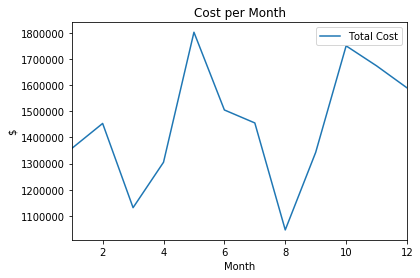

In [22]:
monthly_data_plot.plot()
plt.title("Cost per Month")
plt.xlabel("Month")
plt.ylabel("$")



In [23]:
daily_data_1.head()



,Date,device,energy,Total Cost
0,2019-03-01,COMP_REF1,6162.9256,8663.348872
1,2019-03-01,TUNEL3,5078.9900,7288.358004
2,2019-03-01,TUNEL2,0.0000,0.000000
3,2019-03-01,TUNEL1,0.0000,0.000000
4,2019-03-01,COMP_REF9,0.0000,0.000000


In [182]:
df_energy_bl_plot=daily_data_1[["Date","device","energy"]]

df_energy_bl_plot.head()

,Date,device,energy
0,2019-03-01,COMP_REF1,6162.9256
1,2019-03-01,TUNEL3,5078.9900
2,2019-03-01,TUNEL2,0.0000
3,2019-03-01,TUNEL1,0.0000
4,2019-03-01,COMP_REF9,0.0000


In [180]:
bl_plot_energy = df_energy_bl_plot.pivot_table(index='device', columns='Date')

bl_plot_energy

energy                                                         \
Date       2019-03-01 2019-03-02 2019-03-03 2019-03-04 2019-03-05 2019-03-06   
device                                                                         
COMP_REF1   6162.9256  5867.5939  2366.0853  4607.5877  5112.1222  5261.7971   
COMP_REF13  4652.5780  3674.4212    23.5412    26.1756  3902.5069  5274.4736   
COMP_REF14  1746.1431  1365.2370     4.2068     9.2913  1421.4789  1899.5788   
COMP_REF2   6476.8864  6084.0749  2564.2945  4888.2142  5340.9948  5377.9451   
COMP_REF4      0.0000     0.0000     0.0000     0.0000     0.0000     0.0000   
COMP_REF6      0.0000     0.0000     0.0000     0.0000     0.0000     0.0000   
COMP_REF7   5756.8600  5789.4000  5359.1500  5730.8100  5891.5500  6043.3200   
COMP_REF8      0.0000     0.0000     0.0000     0.0000     0.0000     0.0000   
COMP_REF9      0.0000     0.0000     0.0000     0.0000     0.0000     0.0000   
TUNEL1         0.0000     0.0000     0.0000     0.0000     0.0000     0.0000   
TUNEL2         0.0000     0.0000     0.0000     0.0000     0.0000     0.0000   
TUNEL3      5078.9900  4379.0500  1923.8800  3609.4700  4075.7000  4089.1800   

                                                        ...             \
Date       2019-03-07 2019-03-08 2019-03-09 2019-03-10  ... 2020-02-20   
device                                                  ...              
COMP_REF1   4844.6264  3921.2022  5846.2508  1817.7614  ...     0.0000   
COMP_REF13  5082.0081  3973.6012  4970.2821   346.2011  ...  5564.0217   
COMP_REF14  1948.9371  1479.0968  2165.4084   128.2698  ...  5033.1588   
COMP_REF2   5338.6695  4273.5647  6364.2655  2035.0836  ...  6021.6782   
COMP_REF4      0.0000     0.0000     0.0000     0.0000  ...     6.8002   
COMP_REF6      0.0000     0.0000     0.0000     0.0000  ...  2715.6027   
COMP_REF7   5843.5100  5645.8100  5623.5600  5437.6800  ...  3308.0500   
COMP_REF8      0.0000     0.0000     0.0000     0.0000  ...  6919.1700   
COMP_REF9      0.0000     0.0000     0.0000     0.0000  ...  1655.6551   
TUNEL1         0.0000     0.0000     0.0000     0.0000  ...  1275.7663   
TUNEL2         0.0000     0.0000     0.0000     0.0000  ...  3443.7582   
TUNEL3      3666.5300  3372.6200  4676.8000  1481.9800  ...  4464.0100   

                                                                              \
Date       2020-02-21 2020-02-22 2020-02-23 2020-02-24 2020-02-25 2020-02-26   
device                                                                         
COMP_REF1      0.0000     0.0002     0.0001     0.0064     0.0005     0.0843   
COMP_REF13  4742.3363  5716.5406  3288.7541  4257.5000  5145.2031  5610.7836   
COMP_REF14  4334.8756  5222.9223  2956.6659  3799.2021  4612.5339  5093.0279   
COMP_REF2   6120.3449  5694.2260  3525.5335  4489.0324  5730.2421  5452.7704   
COMP_REF4      6.8073     6.8608     6.7951     6.7082     6.8646     6.8006   
COMP_REF6    555.2040  4477.4952  3300.9081  3410.9843  3323.8084  2591.8908   
COMP_REF7   3002.3400  4008.1100  3547.6500  3427.5400  3819.6000  3630.0400   
COMP_REF8   6932.5100  6938.0200  5566.5694  4670.7628  6959.6000  6927.1800   
COMP_REF9    423.8299  2730.4396  1386.5507   972.0207  2025.4223  1571.4806   
TUNEL1       298.0638  2235.3827  1096.1886   819.4744  1713.5556  1170.9057   
TUNEL2      3051.2487  3763.6610  2112.8930  2707.3114  3298.6039  3637.8900   
TUNEL3      4470.6336  4051.1749  2263.3739  3118.9706  4304.7500  3895.7588   

                                             
Date       2020-02-27 2020-02-28 2020-02-29  
device                                       
COMP_REF1      0.0030     0.0000     0.0000  
COMP_REF13  4752.6165  5610.8269  5039.1275  
COMP_REF14  4296.6382  5095.2384  4548.6573  
COMP_REF2   5992.0897  5526.3986  5831.8796  
COMP_REF4      6.8790     6.8068     6.8297  
COMP_REF6   1209.8101   746.4755  2139.4079  
COMP_REF7   3345.1000  3222.9600  3428.1000  
COMP_REF8   6806.7400  6908.4500  6788.460

In [184]:
bl_plot_energy_2 = df_energy_bl_plot.pivot_table(index='Date', columns='device')

bl_plot_energy_2.head()

energy                                                       \
device      COMP_REF1 COMP_REF13 COMP_REF14  COMP_REF2 COMP_REF4 COMP_REF6   
Date                                                                         
2019-03-01  6162.9256  4652.5780  1746.1431  6476.8864       0.0       0.0   
2019-03-02  5867.5939  3674.4212  1365.2370  6084.0749       0.0       0.0   
2019-03-03  2366.0853    23.5412     4.2068  2564.2945       0.0       0.0   
2019-03-04  4607.5877    26.1756     9.2913  4888.2142       0.0       0.0   
2019-03-05  5112.1222  3902.5069  1421.4789  5340.9948       0.0       0.0   

                                                                 
device     COMP_REF7 COMP_REF8 COMP_REF9 TUNEL1 TUNEL2   TUNEL3  
Date                                                             
2019-03-01   5756.86       0.0       0.0    0.0    0.0  5078.99  
2019-03-02   5789.40       0.0       0.0    0.0    0.0  4379.05  
2019-03-03   5359.15       0.0       0.0    0.0    0.0  1923.88  
2019-03-04   5730.81       0.0       0.0    0.0    0.0  3609.47  
2019-03-05   5891.55       0.0       0.0    0.0    0.0  4075.70

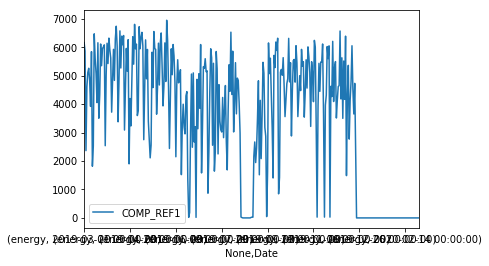

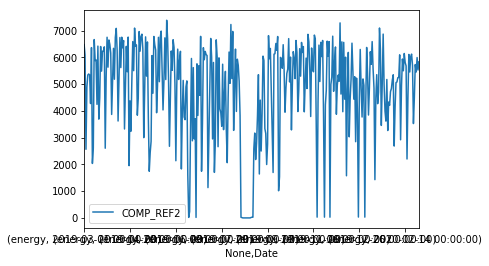

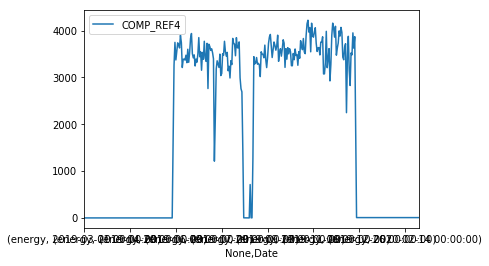

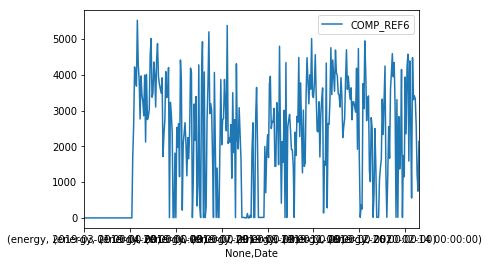

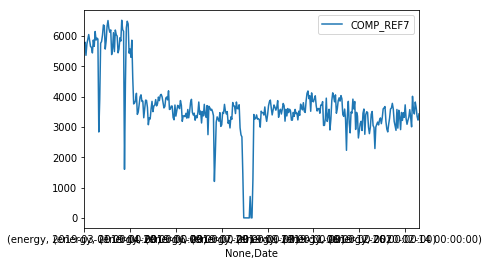

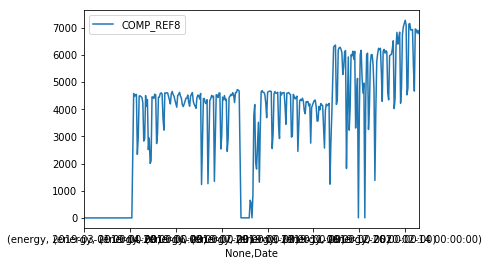

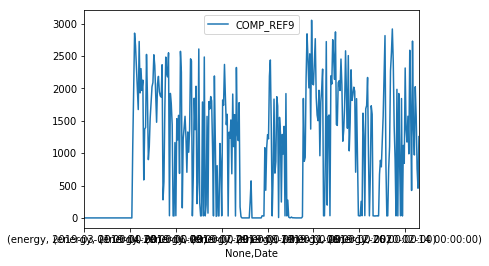

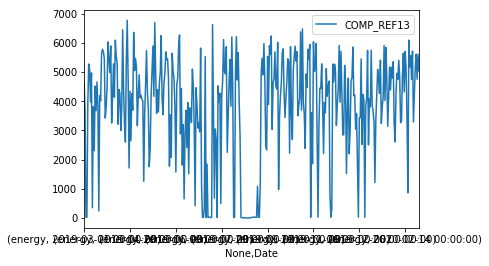

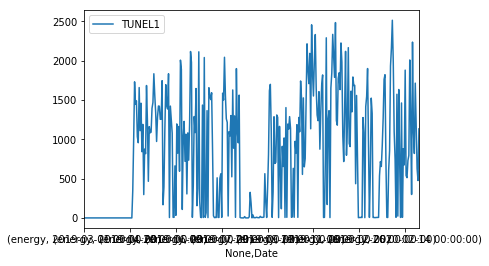

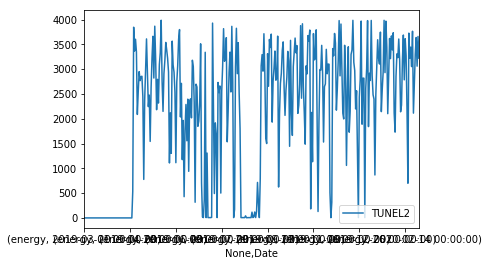

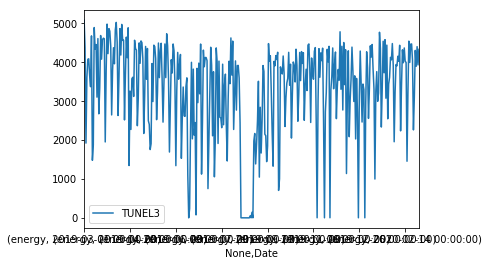

In [181]:
bl_plot_energy.loc['COMP_REF1'].plot()
plt.legend()
plt.show()

bl_plot_energy.loc['COMP_REF2'].plot()
plt.legend()
plt.show()

bl_plot_energy.loc['COMP_REF4'].plot()
plt.legend()
plt.show()

bl_plot_energy.loc['COMP_REF6'].plot()
plt.legend()
plt.show()

bl_plot_energy.loc['COMP_REF7'].plot()
plt.legend()
plt.show()

bl_plot_energy.loc['COMP_REF8'].plot()
plt.legend()
plt.show()

bl_plot_energy.loc['COMP_REF9'].plot()
plt.legend()
plt.show()

bl_plot_energy.loc['COMP_REF13'].plot()
plt.legend()
plt.show()

bl_plot_energy.loc['TUNEL1'].plot()
plt.legend()
plt.show()

bl_plot_energy.loc['TUNEL2'].plot()
plt.legend()
plt.show()

bl_plot_energy.loc['TUNEL3'].plot()
plt.legend()
plt.show()

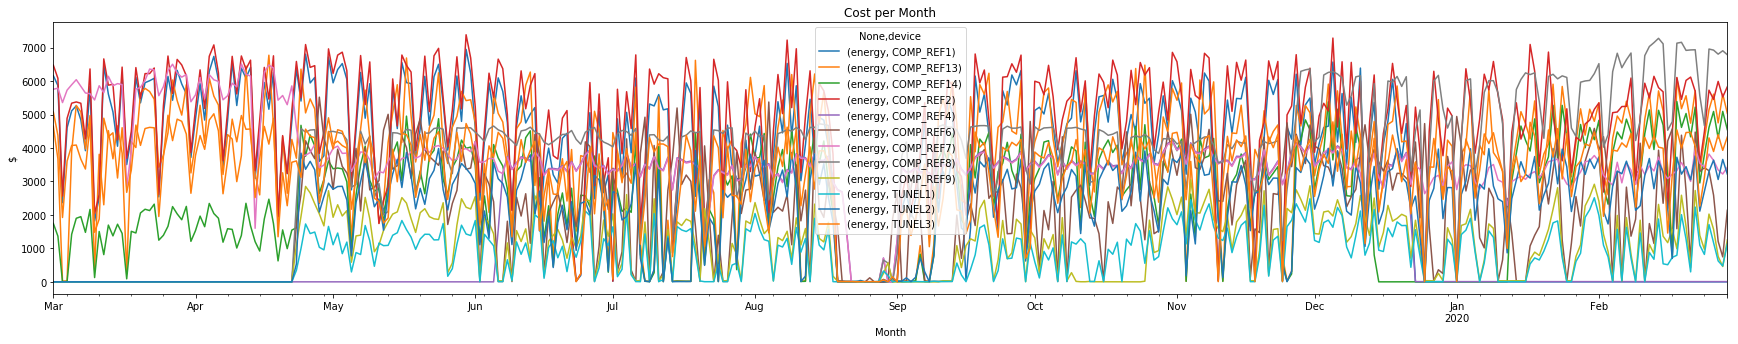

<Figure size 432x288 with 0 Axes>

In [185]:
Energy_Plot_1=bl_plot_energy_2.plot(kind="line",figsize=(30,5))  

type(Energy_Plot)

plt.title("Cost per Month")
plt.xlabel("Month")
plt.ylabel("$")

plt.show()
plt.tight_layout()

In [187]:
df_TC_bl_plot=daily_data_1[["Date","device","Total Cost"]]
df_TC_bl_plot.head()

,Date,device,Total Cost
0,2019-03-01,COMP_REF1,8663.348872
1,2019-03-01,TUNEL3,7288.358004
2,2019-03-01,TUNEL2,0.000000
3,2019-03-01,TUNEL1,0.000000
4,2019-03-01,COMP_REF9,0.000000


In [188]:
bl_plot_TC = df_TC_bl_plot.pivot_table(index='device', columns='Date')

bl_plot_TC

Total Cost                                                      \
Date         2019-03-01   2019-03-02   2019-03-03   2019-03-04   2019-03-05   
device                                                                        
COMP_REF1   8663.348872  6924.216995  3426.565435  7976.080509  8033.818215   
COMP_REF13  6756.636409  3474.836917    36.923328    39.877074  6785.114505   
COMP_REF14  2534.492149  1290.825345     6.255348    14.407094  2469.046264   
COMP_REF2   9158.706850  7137.632284  3668.928076  8460.832579  8360.194823   
COMP_REF4      0.000000     0.000000     0.000000     0.000000     0.000000   
COMP_REF6      0.000000     0.000000     0.000000     0.000000     0.000000   
COMP_REF7   8344.763195  6528.657048  8155.312170  8950.346281  9007.216201   
COMP_REF8      0.000000     0.000000     0.000000     0.000000     0.000000   
COMP_REF9      0.000000     0.000000     0.000000     0.000000     0.000000   
TUNEL1         0.000000     0.000000     0.000000     0.000000     0.000000   
TUNEL2         0.000000     0.000000     0.000000     0.000000     0.000000   
TUNEL3      7288.358004  5061.237472  2729.927290  6224.382171  6376.443471   

                                                                             \
Date         2019-03-06   2019-03-07   2019-03-08   2019-03-09   2019-03-10   
device                                                                        
COMP_REF1   7951.000646  6795.515240  6693.423556  6675.739488  1806.959208   
COMP_REF13  7738.044007  7466.690515  6028.649255  5909.278496   332.846309   
COMP_REF14  2808.380066  2826.778820  2244.764469  2496.662784   125.282979   
COMP_REF2   8165.649426  7566.609901  7288.037052  7292.012216  2061.336989   
COMP_REF4      0.000000     0.000000     0.000000     0.000000     0.000000   
COMP_REF6      0.000000     0.000000     0.000000     0.000000     0.000000   
COMP_REF7   9329.230424  8967.090948  8178.661672  6378.452396  8203.218568   
COMP_REF8      0.000000     0.000000     0.000000     0.000000     0.000000   
COMP_REF9      0.000000     0.000000     0.000000     0.000000     0.000000   
TUNEL1         0.000000     0.000000     0.000000     0.000000     0.000000   
TUNEL2         0.000000     0.000000     0.000000     0.000000     0.000000   
TUNEL3      6187.120419  5235.374165  5670.932298  5344.925604  1537.173082   

            ...                                                       \
Date        ...    2020-02-20   2020-02-21   2020-02-22   2020-02-23   
device      ...                                                        
COMP_REF1   ...      0.000000     0.000000     0.000187     0.000188   
COMP_REF13  ...   8497.781497  6910.845530  6479.382303  4293.977413   
COMP_REF14  ...   7699.497393  6332.475500  5947.293798  3851.784867   
COMP_REF2   ...   9041.114131  9125.888356  6563.258997  5018.076702   
COMP_REF4   ...     10.222117     9.725152     7.636832    10.207545   
COMP_REF6   ...   3819.914110   912.248291  5025.395878  4965.674102   
COMP_REF7   ...   4988.456455  4368.640244  4471.799452  5250.707489   
COMP_REF8   ...  10452.408994  9927.468175  7712.761644  8039.700738   
COMP_REF9   ...   2344.201956   691.873279  3048.512583  1914.711787   
TUNEL1      ...   1793.468143   490.011184  2512.647834  1504.353875   
TUNEL2      ...   5214.466279  4441.713678  4233.298466  2780.374629   
TUNEL3      ...   6700.842955  6537.522446  4636.981833  3053.620084   

                                                                   \
Date         2020-02-24    2020-02-25    2020-02-26    2020-02-27   
device                                                              
COMP_REF1      0.010414      0.000750      0.139053      0.005633   
COMP_REF13  7261.887667   7615.083577   8555.826763   6971.899873   
COMP_REF14  6483.840308   6851.362137   7773.581049   6314.951623   
COMP_REF2   7649.443136   8634.468511   7979.794745   8718.831090   
COMP_REF4     10.120101     10.332873     10.207856     10.328960   
COMP_REF

In [192]:
bl_plot_TC_2 = df_TC_bl_plot.pivot_table(index='Date', columns='device')

bl_plot_TC_2.head()

Total Cost                                                   \
device        COMP_REF1   COMP_REF13   COMP_REF14    COMP_REF2 COMP_REF4   
Date                                                                       
2019-03-01  8663.348872  6756.636409  2534.492149  9158.706850       0.0   
2019-03-02  6924.216995  3474.836917  1290.825345  7137.632284       0.0   
2019-03-03  3426.565435    36.923328     6.255348  3668.928076       0.0   
2019-03-04  7976.080509    39.877074    14.407094  8460.832579       0.0   
2019-03-05  8033.818215  6785.114505  2469.046264  8360.194823       0.0   

                                                                     \
device     COMP_REF6    COMP_REF7 COMP_REF8 COMP_REF9 TUNEL1 TUNEL2   
Date                                                                  
2019-03-01       0.0  8344.763195       0.0       0.0    0.0    0.0   
2019-03-02       0.0  6528.657048       0.0       0.0    0.0    0.0   
2019-03-03       0.0  8155.312170       0.0       0.0    0.0    0.0   
2019-03-04       0.0  8950.346281       0.0       0.0    0.0    0.0   
2019-03-05       0.0  9007.216201       0.0       0.0    0.0    0.0   

                         
device           TUNEL3  
Date                     
2019-03-01  7288.358004  
2019-03-02  5061.237472  
2019-03-03  2729.927290  
2019-03-04  6224.382171  
2019-03-05  6376.443471

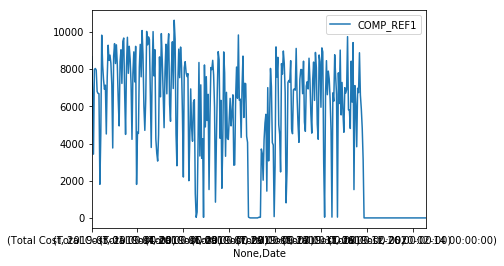

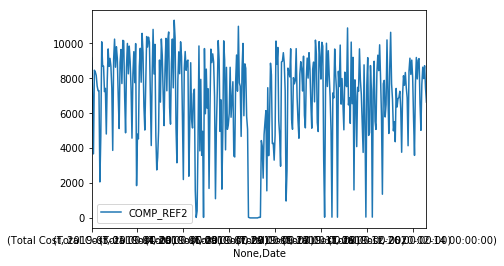

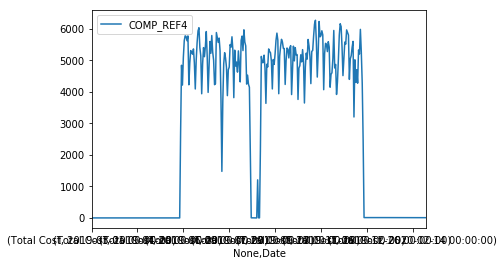

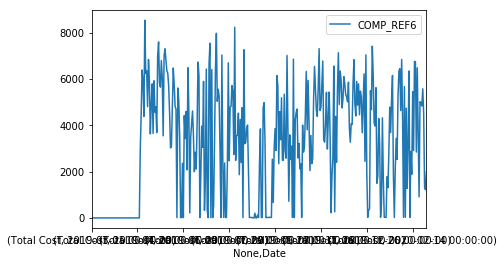

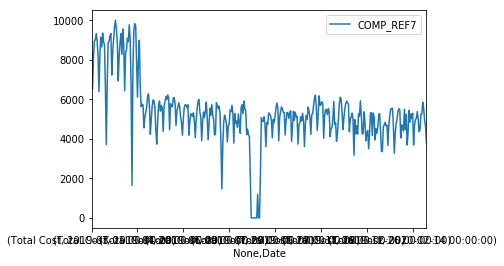

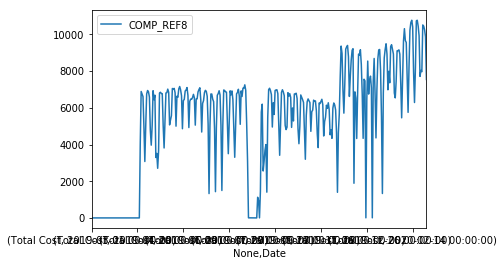

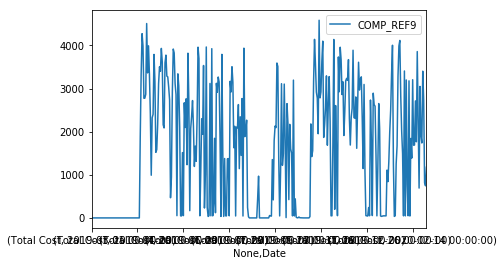

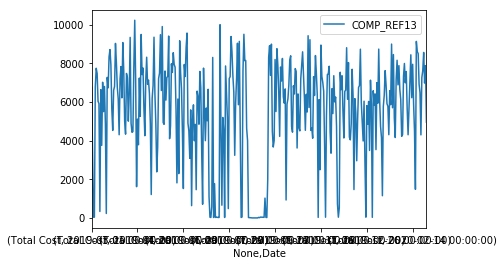

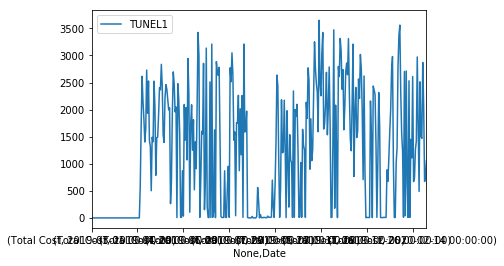

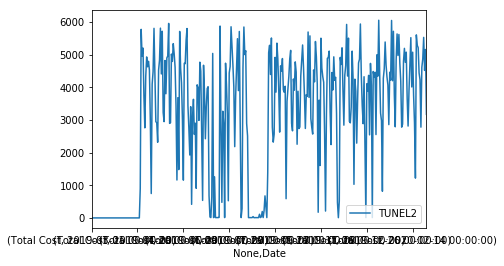

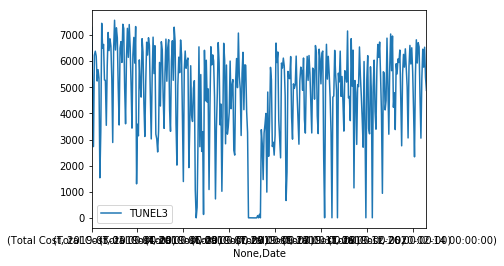

In [189]:
bl_plot_TC.loc['COMP_REF1'].plot()
plt.legend()
plt.show()

bl_plot_TC.loc['COMP_REF2'].plot()
plt.legend()
plt.show()

bl_plot_TC.loc['COMP_REF4'].plot()
plt.legend()
plt.show()

bl_plot_TC.loc['COMP_REF6'].plot()
plt.legend()
plt.show()

bl_plot_TC.loc['COMP_REF7'].plot()
plt.legend()
plt.show()

bl_plot_TC.loc['COMP_REF8'].plot()
plt.legend()
plt.show()

bl_plot_TC.loc['COMP_REF9'].plot()
plt.legend()
plt.show()

bl_plot_TC.loc['COMP_REF13'].plot()
plt.legend()
plt.show()

bl_plot_TC.loc['TUNEL1'].plot()
plt.legend()
plt.show()

bl_plot_TC.loc['TUNEL2'].plot()
plt.legend()
plt.show()

bl_plot_TC.loc['TUNEL3'].plot()
plt.legend()
plt.show()

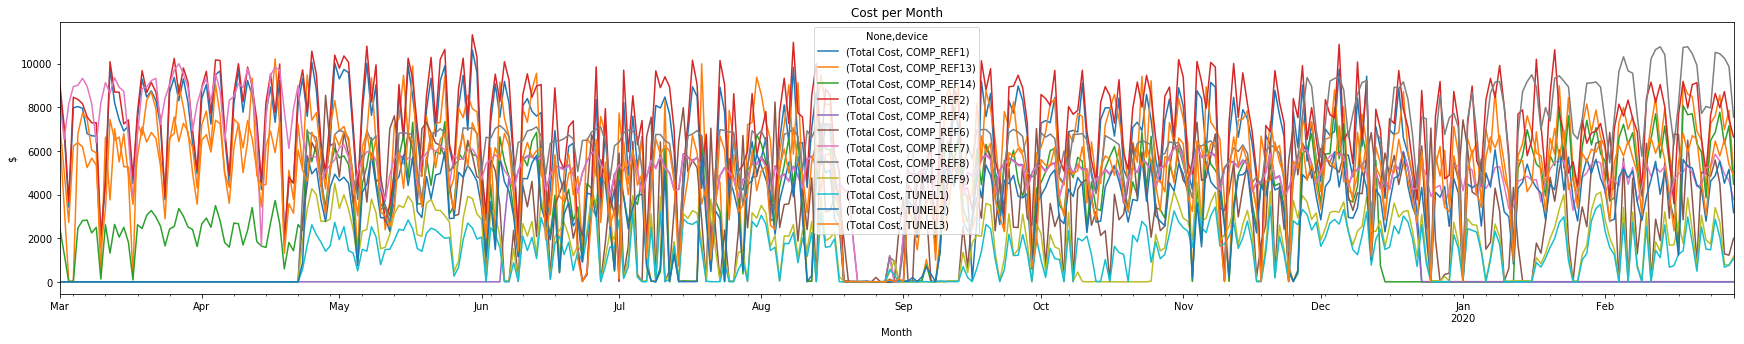

<Figure size 432x288 with 0 Axes>

In [197]:
TC_Plot_1=bl_plot_TC_2.plot(kind="line",figsize=(30,5))  

type(Energy_Plot)

plt.title("Cost per Month")
plt.xlabel("Month")
plt.ylabel("$")

plt.show()
plt.tight_layout()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a5f3e6d90>,
      dtype=object)

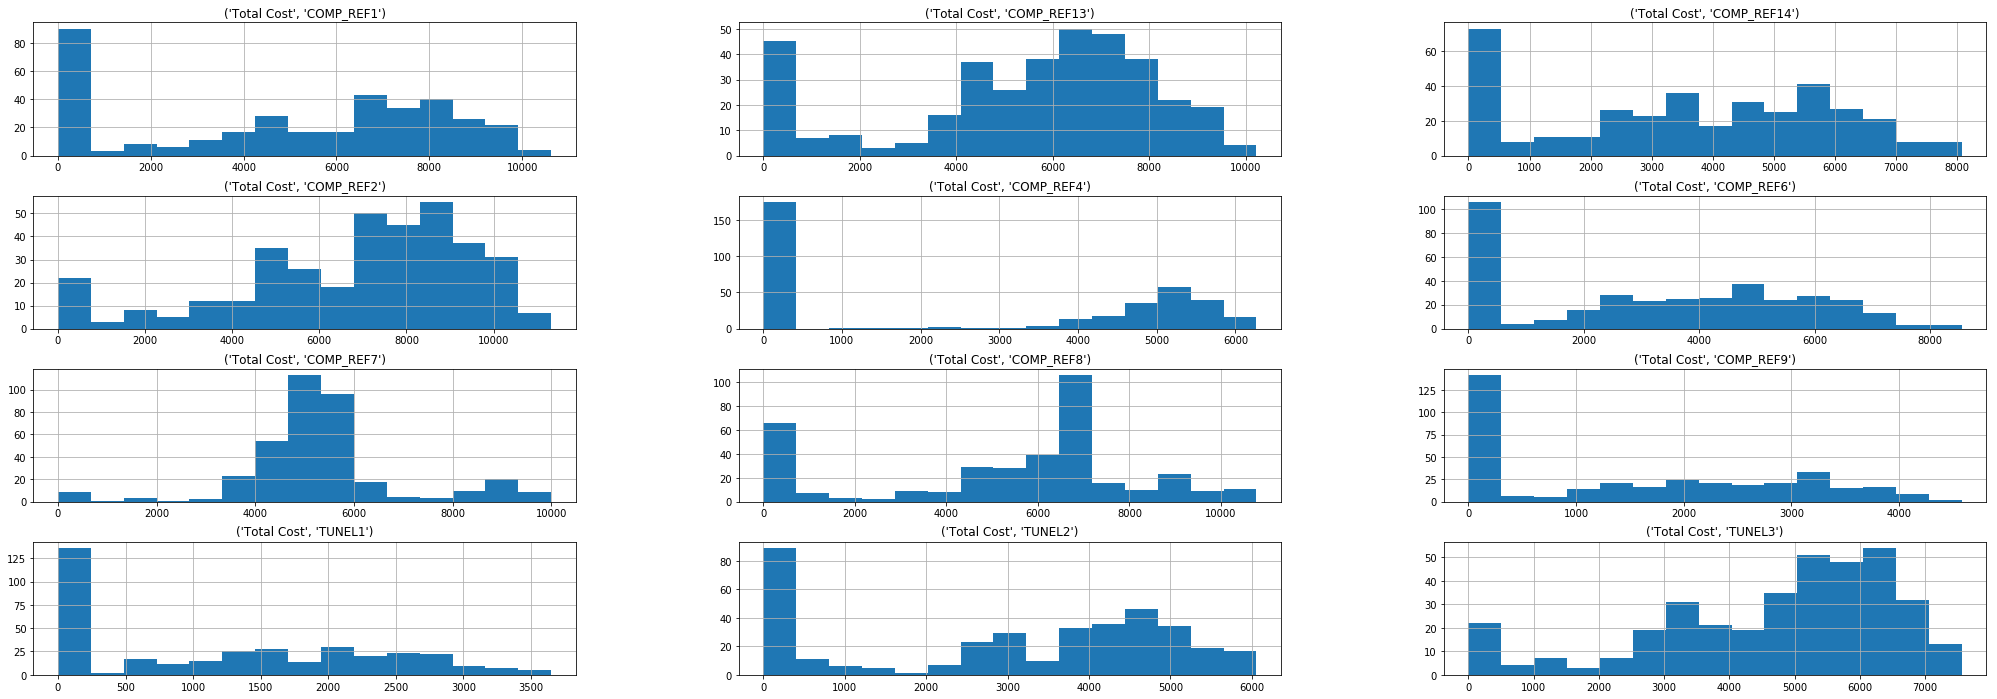

In [193]:
bl_plot_TC_2.hist(bins=15,figsize=(35,12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a4b8a7d50>,
      dtype=object)

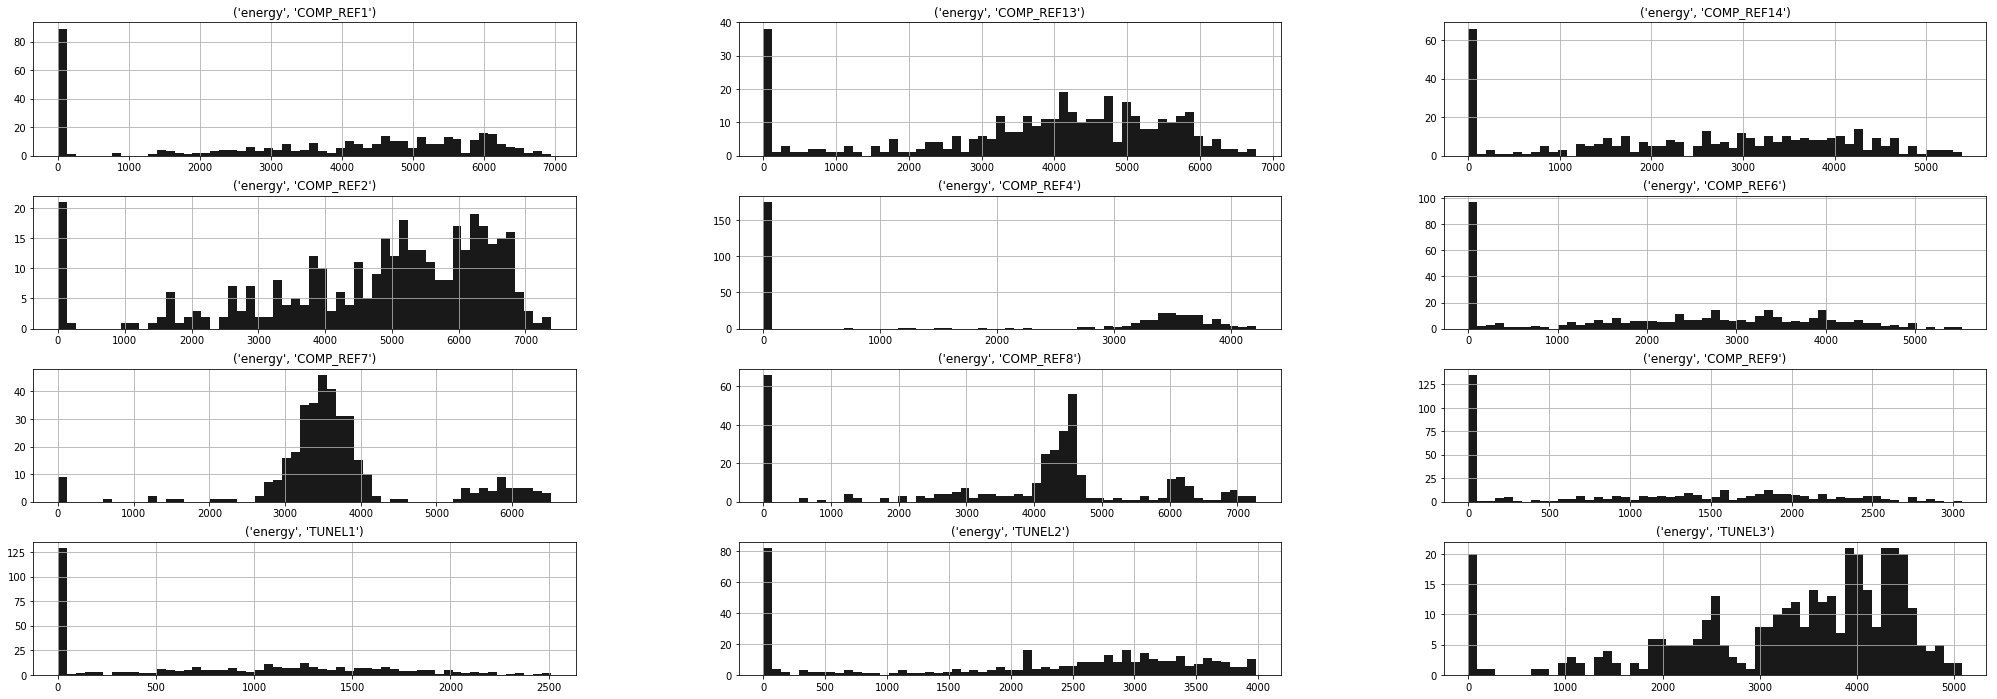

In [194]:
bl_plot_energy_2.hist(color='k', alpha=.9, bins=55,figsize=(35,12))


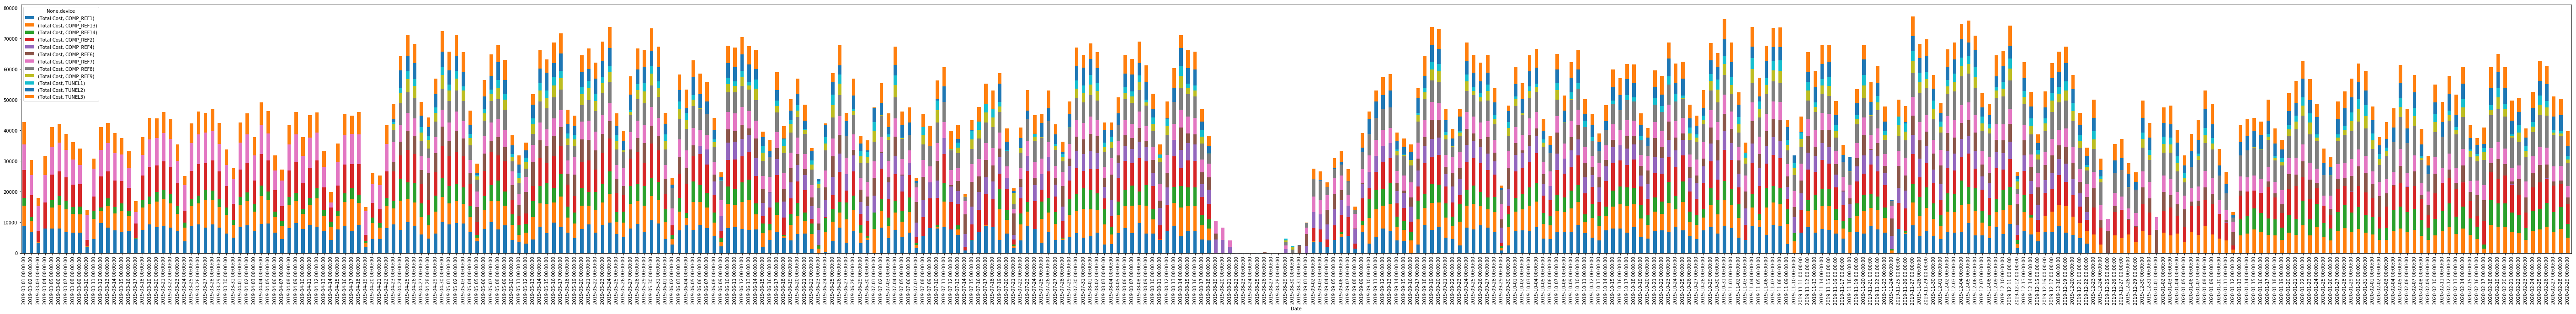

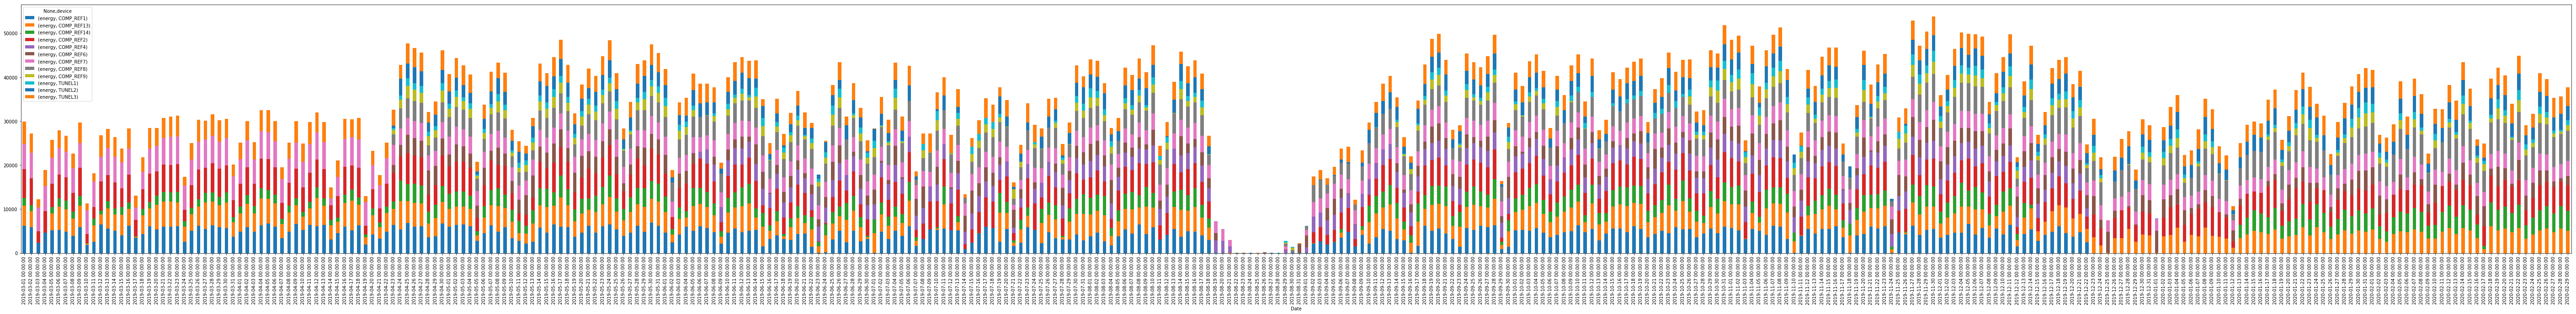

In [196]:
bl_plot_TC_2.plot.bar(figsize=(100, 10),stacked=True)

bl_plot_energy_2.plot.bar(figsize=(100, 10),stacked=True)

<Figure size 432x288 with 0 Axes>

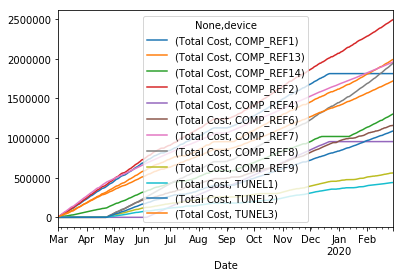

In [198]:
bl_plot_TC_2=bl_plot_TC_2.cumsum()
plt.figure();
bl_plot_TC_2.plot();

<Figure size 432x288 with 0 Axes>

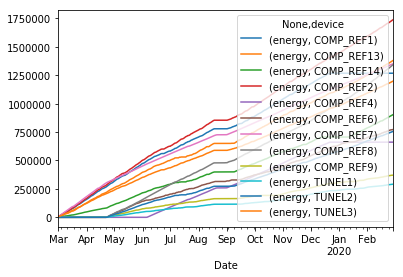

In [199]:
bl_plot_energy_2=bl_plot_energy_2.cumsum()
plt.figure();
bl_plot_energy_2.plot();

## Make production recommendations, based on the optimal production. 

In [ ]:
# Daniel